In [1]:
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.preprocessing import scale

In [2]:
path = 'C:\\Users\\Peter\\Desktop\\Thinkful\\Thinkful-Lessons\\Thinkful 3.6\\creditcard.csv'
df = pd.read_csv(path)

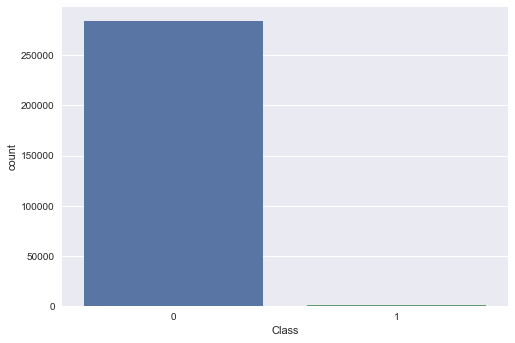

0    284315
1       492
Name: Class, dtype: int64


In [3]:
sns.countplot("Class", data = df)
plt.show()
print(df['Class'].value_counts())

In [ ]:
#So we can see that the data is highly imbalanced.  There are oer 280,000 normal transations and less than 500 fraudulent ones.

In [ ]:
#The majority of the data is principle compenent data from PCA, we do have some data on Amount and Time so lets inspect that

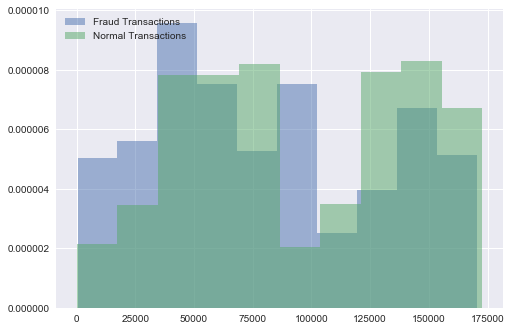

Ttest_indResult(statistic=6.5767011365339165, pvalue=4.8182688917960346e-11)


In [4]:
plt.hist(df[df['Class']==1].Time, alpha = 0.5, label = 'Fraud Transactions', normed = True)
plt.hist(df[df['Class']==0].Time, alpha = 0.5, label = 'Normal Transactions', normed = True)
plt.legend(loc='upper left')
plt.show()
print(ttest_ind(df[df['Class']==0].Time,df[df['Class']==1].Time))

The incredibly low pvalue indicates that these two sets of data are significantly different so we can assume that there is valuable data there.  Lets take a look to see if the amount data is also like this.

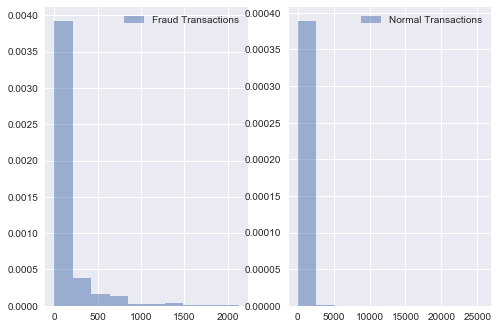

Ttest_indResult(statistic=6.5767011365339165, pvalue=4.8182688917960346e-11)


In [5]:
plt.subplot(121)
plt.hist(df[df['Class']==1].Amount, alpha = 0.5, label = 'Fraud Transactions', normed = True)
plt.legend(loc='upper right')

plt.subplot(122)
plt.hist(df[df['Class']==0].Amount, alpha = 0.5, label = 'Normal Transactions', normed = True)
plt.legend(loc='upper right')

plt.show()
print(ttest_ind(df[df['Class']==0].Time,df[df['Class']==1].Time))

In [6]:
def eval_con_mat(conmat):
    print('Sensitivity:{}%'.format(round(conmat[1][1]/(conmat[1][0]+conmat[1][1]),4)*100))
    print('Specificity:{}%'.format(round(conmat[0][0]/(conmat[0][1]+conmat[0][0]),4)*100))

In [7]:
df['Time'] = scale(df['Time'])
df['Amount'] = scale(df['Amount'])

In [25]:
fraud = df[df['Class']==1]
normal = df[df['Class']==0]

trainfraud = fraud[246:]
trainnorm = normal.sample(246)
training_data = pd.concat([trainfraud, trainnorm])

X_train = training_data.drop(['Class'], axis=1)
Y_train = training_data['Class']

In [26]:
knn = KNeighborsClassifier(algorithm='auto',
                           leaf_size=30,
                           metric='minkowski',
                           metric_params=None,
                           n_jobs=1,
                           n_neighbors=28,
                           p=2,
                           weights='distance')
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=28, p=2,
           weights='distance')

In [27]:
iteration = 1
for x in range (10):
    testing_data = pd.concat([fraud.sample(246), normal.sample(246)])
    X_test = testing_data.drop(['Class'], axis=1)
    Y_test = testing_data['Class']

    print('Iteration No. :{}'.format(iteration))
    Y_ = knn.predict(X_test)
    confusion = confusion_matrix(Y_test, Y_)
    print(confusion)
    eval_con_mat(confusion)
    print(classification_report(Y_test, Y_))
    
    iteration = iteration + 1

Iteration No. :1
[[244   2]
 [ 18 228]]
Sensitivity:92.67999999999999%
Specificity:99.19%
             precision    recall  f1-score   support

          0       0.93      0.99      0.96       246
          1       0.99      0.93      0.96       246

avg / total       0.96      0.96      0.96       492

Iteration No. :2
[[242   4]
 [ 16 230]]
Sensitivity:93.5%
Specificity:98.37%
             precision    recall  f1-score   support

          0       0.94      0.98      0.96       246
          1       0.98      0.93      0.96       246

avg / total       0.96      0.96      0.96       492

Iteration No. :3
[[243   3]
 [ 18 228]]
Sensitivity:92.67999999999999%
Specificity:98.78%
             precision    recall  f1-score   support

          0       0.93      0.99      0.96       246
          1       0.99      0.93      0.96       246

avg / total       0.96      0.96      0.96       492

Iteration No. :4
[[242   4]
 [ 18 228]]
Sensitivity:92.67999999999999%
Specificity:98.37%
        

In [28]:
testing_data = pd.concat([fraud[:246], normal.sample(int(284315/2))])
X_test = testing_data.drop(['Class'], axis=1)
Y_test = testing_data['Class']

Y_ = knn.predict(X_test)
confusion = confusion_matrix(Y_test, Y_)
print(confusion)
eval_con_mat(confusion)
print(classification_report(Y_test, Y_))

[[140553   1604]
 [    34    212]]
Sensitivity:86.18%
Specificity:98.87%
             precision    recall  f1-score   support

          0       1.00      0.99      0.99    142157
          1       0.12      0.86      0.21       246

avg / total       1.00      0.99      0.99    142403



In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(df.drop('Class', axis=1), df['Class'],  test_size = 0.4)

from sklearn.svm import SVC
svc = SVC(C=1.0,
          cache_size=200, 
          class_weight='auto', 
          coef0=0.0,
          decision_function_shape=None, 
          degree=3, 
          gamma='auto', 
          kernel='rbf',
          max_iter=-1, 
          probability=False, 
          random_state=None, 
          shrinking=True,
          tol=0.001, 
          verbose=False)

In [ ]:
svc.fit(X_train,Y_train)

C:\Users\Peter\Anaconda3\lib\site-packages\sklearn\utils\class_weight.py:65: DeprecationWarning: The class_weight='auto' heuristic is deprecated in 0.17 in favor of a new heuristic class_weight='balanced'. 'auto' will be removed in 0.19
  " 0.19", DeprecationWarning)


In [19]:
Y_ = svc.predict(X_test)
confusion = confusion_matrix(Y_test, Y_)
print(confusion)
eval_con_mat(confusion)
print(classification_report(Y_test, Y_))

[[113430    305]
 [    56    132]]
Sensitivity:70.21%
Specificity:99.72999999999999%
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    113735
          1       0.30      0.70      0.42       188

avg / total       1.00      1.00      1.00    113923



In [32]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train,Y_train)
Y_ = bnb.predict(X_test)
confusion = confusion_matrix(Y_test, Y_)
print(confusion)
eval_con_mat(confusion)
print(classification_report(Y_test, Y_))

[[140225   1932]
 [    40    206]]
Sensitivity:83.74000000000001%
Specificity:98.64%
             precision    recall  f1-score   support

          0       1.00      0.99      0.99    142157
          1       0.10      0.84      0.17       246

avg / total       1.00      0.99      0.99    142403

